# Linearisation Workflow

In [1]:
import mammos_analysis
import mammos_mumag
import mammos_entity as me
import mammos_units as u
import pandas as pd

u.set_enabled_equivalencies(u.magnetic_flux_field())

Assuming we already have the result of a hysteresis loop in the file `box.dat`, we can load it with

In [3]:
df = pd.read_csv("box.dat", delimiter=" ", names=["configuration_type", "mu0_Hext", "polarisation", "energy_density"])

loop_results = mammos_mumag.hysteresis.Result(
    H=me.Entity(
        "ExternalMagneticField",
        value=(df["mu0_Hext"].to_numpy() * u.T).to(u.A / u.m),
        unit=u.A / u.m,
    ),
    M=me.Ms(
        (df["polarisation"].to_numpy() * u.T).to(u.A / u.m),
        unit=u.A / u.m,
    ),
    configuration_type=df["configuration_type"].to_numpy(),
    energy_density=me.Entity("EnergyDensity", value=df["energy_density"], unit=u.J / u.m**3),
)

From this object we can extract `H`, `M`, and `EnergyDensity`. These represents, respectively, the external applied field, the spontaneous magnetisation, and the energy density.

In [4]:
loop_results.H

ExternalMagneticField(value=[ 397887.35751314  397728.20257013  397569.04762713 ... -168226.77475654
 -168385.92969955 -168545.08464255], unit=A / m)

In [5]:
loop_results.M

SpontaneousMagnetization(value=[ 774726.16085789  782438.32816025  778637.18273716 ... -616355.7133041
 -626352.76724119 -641827.62543558], unit=A / m)

In [6]:
loop_results.energy_density

EnergyDensity(value=[-0.32673491 -0.3278284  -0.32865243 ... -0.04862285 -0.05375878
 -0.05665882], unit=J / m3)

In [7]:
loop_results.dataframe

,configuration_type,H,M,energy_density
0,1,397887.357513,774726.160858,-0.326735
1,0,397728.202570,782438.328160,-0.327828
2,0,397569.047627,778637.182737,-0.328652
3,0,397409.892684,776802.108717,-0.328566
4,0,397250.737741,777093.810966,-0.328466
...,...,...,...,...
3555,162,-167908.464871,-607053.205631,-0.045942
3556,0,-168067.619814,-610742.780173,-0.046991
3557,163,-168226.774757,-616355.713304,-0.048623
3558,164,-168385.929700,-626352.767241,-0.053759


We can plot the hysteresis loop with the `plot` method:

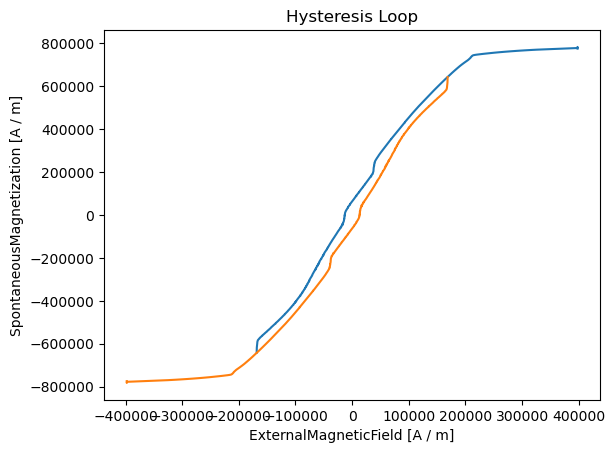

In [8]:
loop_results.plot(configuration_marks=False)

We can extract the extrinsic properties with the `extrinsic_properties` function from the `mammos_analysis` package:

In [12]:
extrinsic_properties = mammos_analysis.hysteresis.extrinsic_properties(loop_results.M, loop_results.H)

In [13]:
extrinsic_properties.Mr

Remanence(value=-13209.860269418283, unit=A / m)

In [14]:
extrinsic_properties.Hc

CoercivityHcExternal(value=-63147.24333538003, unit=A / m)

And finally we can evaluate the length of the linearised segment using the `linearised_segment` function:

In [15]:
mammos_analysis.hysteresis.linearised_segment(loop_results.M, loop_results.H)

<Quantity 0.96131837 A / m>